In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [4]:
filename = os.listdir('../input/az-handwritten-alphabets-in-csv-format')

In [7]:
df = pd.read_csv('../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [9]:
df.shape

(372450, 785)

In [10]:
df.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df.drop('0',axis=1)
y = df['0']

In [12]:
X.shape

(372450, 784)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.20,shuffle=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16)

In [15]:
# Use the same function above for the validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 16)

In [16]:
X_train.shape,X_val.shape,X_test.shape

((223470, 784), (74490, 784), (74490, 784))

In [17]:
y_train.shape,y_val.shape,y_test.shape

((223470,), (74490,), (74490,))

In [18]:
import matplotlib.pyplot as plt

In [19]:
def show_letter(X_train,index):
    img0 = X_train.iloc[index].values.reshape(28,28)/255   #values=series convert into numpy array, 
    plt.imshow(img0)                                       #reshape= it changes shape 28*28,/255=convert scale into 0 to 1,normalization

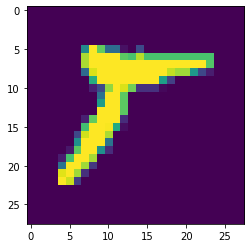

In [21]:
show_letter(X_train,7245)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train = to_categorical(y_train,num_classes=26)
y_test = to_categorical(y_test,num_classes=26)

In [24]:
y_val=to_categorical(y_val,num_classes=26)
y_val

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
X_train=X_train.values.reshape(223470,28,28,1)
X_train=X_train/255

In [26]:
X_val=X_val.values.reshape(74490,28,28,1)
X_val=X_val/255

In [27]:
X_test = X_test.values.reshape(74490,28,28,1)
X_test = X_test/255

In [28]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential()
model.add(Conv2D(32, (3,3),input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(64, (3,3)))
model.add(MaxPool2D())
model.add(Conv2D(128,(3,3)))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(26,activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

2022-09-16 12:08:57.979502: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [31]:
# model.fit(X_train, y_train, epochs=12, batch_size=16)

model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size = 64, epochs=20)

2022-09-16 12:09:03.625568: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
3492/3492 [==============================] - 91s 26ms/step - loss: 0.2277 - accuracy: 0.9349 - val_loss: 0.1336 - val_accuracy: 0.9601
Epoch 2/20
3492/3492 [==============================] - 90s 26ms/step - loss: 0.0936 - accuracy: 0.9732 - val_loss: 0.0991 - val_accuracy: 0.9718
Epoch 3/20
3492/3492 [==============================] - 93s 27ms/step - loss: 0.0723 - accuracy: 0.9795 - val_loss: 0.0810 - val_accuracy: 0.9779
Epoch 4/20
3492/3492 [==============================] - 99s 28ms/step - loss: 0.0594 - accuracy: 0.9830 - val_loss: 0.0778 - val_accuracy: 0.9786
Epoch 5/20
3492/3492 [==============================] - 96s 27ms/step - loss: 0.0499 - accuracy: 0.9855 - val_loss: 0.0761 - val_accuracy: 0.9804
Epoch 6/20
3492/3492 [==============================] - 101s 29ms/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 0.0743 - val_accuracy: 0.9814
Epoch 7/20
3492/3492 [==============================] - 93s 27ms/step - loss: 0.0371 - accuracy: 0.9888 - val_loss: 0.0724 

In [32]:
model.evaluate(X_test, y_test, batch_size=64)

1164/1164 [==============================] - 10s 8ms/step - loss: 0.1179 - accuracy: 0.9856


[0.11792583763599396, 0.985555112361908]